### Подключаем библиотеки

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Считываем файл Student_Performance.csv

In [4]:
df = pd.read_csv("Student_Performance.csv", sep=",")
df.head(11)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


### Описание: 
Набор данных "Student Performance Dataset" 

Предназначен для изучения факторов, влияющих на академическую успеваемость студентов. \
Набор данных состоит из 10 000 записей о студентах, где каждая запись содержит информацию о различных предикторах и индексе успеваемости.

### Описание элементов датасета:
* Hours Studied - Общее количество часов, потраченных на учебу каждым студентом.
* Previous Scores - Оценки, полученные студентами на предыдущих тестах.
* Extracurricular Activities - Участвует ли студент во внешкольных мероприятиях (Да или Нет).
* Sleep Hours - Среднее количество часов сна, которое студент получал в день.
* Sample Question Papers Practiced - Количество образцов экзаменационных работ, которые студент отработал.
* Performance Index - Мера общей успеваемости каждого студента. (Target)

### Посмотрели информацию о датасете:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


### Посмотрели сводную статистику датасета

In [10]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


### Посмотрели размерность датасета

In [12]:
df.shape

(10000, 6)

### Посмотрели датасет на нулевые значения

In [14]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### Привели значения Yes & No в 1 и 0 для обучения модели

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df["Extracurricular Activities"] =  encoder.fit_transform(df["Extracurricular Activities"])

### Сделали матрицу коррелаций

In [18]:
col = df.columns
corr = df[col].corr()

<Axes: >

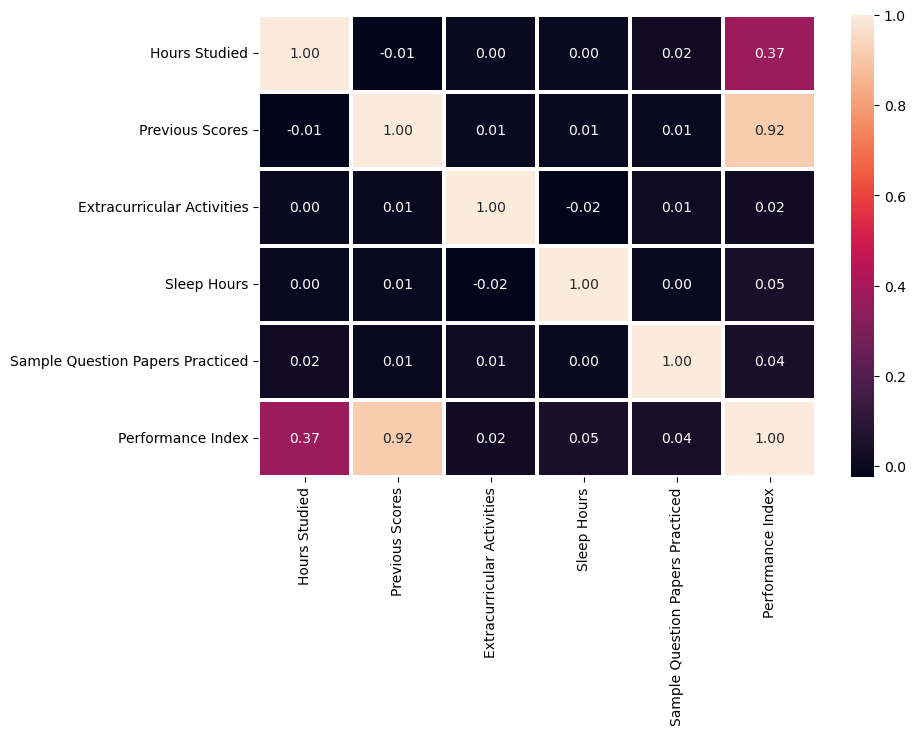

In [19]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

### Импортируем модели для дальнейшего обучения

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

#### KNeighborsRegressor (Метод k-ближайших соседей для регрессии)
Обоснование выбора:

1) Метод k-ближайших соседей (KNN) является непараметрическим методом, который не делает предположений о распределении данных. Это делает его гибким и подходящим для задач, где данные имеют сложную структуру.

2) KNN хорошо работает, когда данные имеют локальные зависимости, то есть значение целевой переменной зависит от значений близлежащих точек в пространстве признаков.

3) Модель проста в реализации и интерпретации, что делает её хорошим выбором для начального анализа данных.

4) Подходит для задач регрессии, где важно учитывать близость объектов в пространстве признаков.

#### RandomForestRegressor (Случайный лес для регрессии)
Обоснование выбора:

1) Случайный лес — это ансамблевая модель, которая строит множество деревьев решений и усредняет их предсказания. Это делает её устойчивой к переобучению и способной работать с данными, имеющими сложные зависимости.

2) Модель хорошо справляется с нелинейными зависимостями и взаимодействиями между признаками.

3) RandomForestRegressor автоматически определяет важность признаков, что полезно для анализа данных.

4) Модель устойчива к выбросам и шуму в данных.

#### LinearRegression (Линейная регрессия)
Обоснование выбора:

1) Линейная регрессия — это простая и интерпретируемая модель, которая предполагает линейную зависимость между признаками и целевой переменной.

2) Модель хорошо работает, когда данные имеют линейную структуру или могут быть линеаризованы.

3) Линейная регрессия является базовой моделью, которая часто используется для сравнения с более сложными моделями.

4) Модель быстро обучается и требует мало вычислительных ресурсов.

### Подготовка данных для обучения:

In [26]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Обучение моделей:

In [28]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [29]:
rfc = RandomForestRegressor(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)


In [30]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
y_pred_lnr = lnr.predict(X_test)


## Метрики классификации

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score

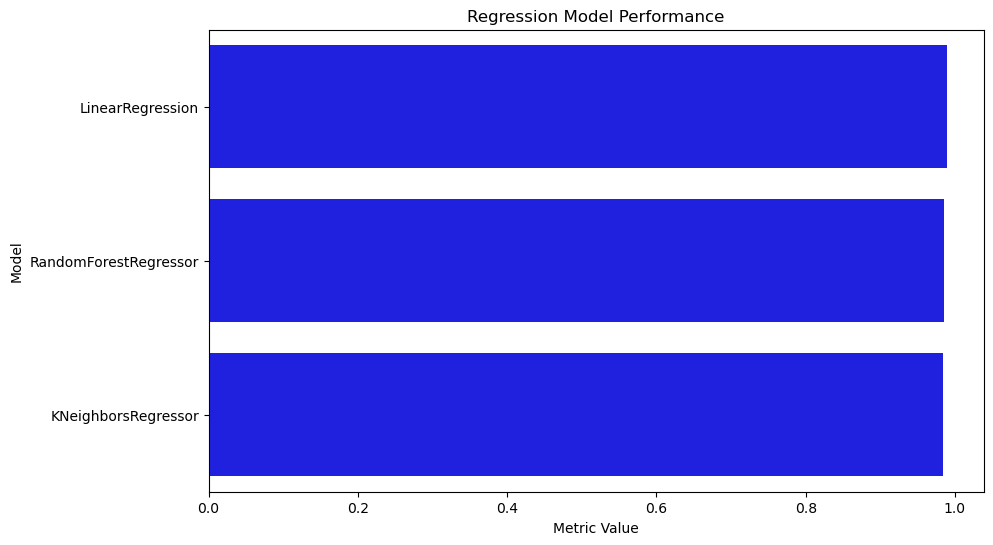

In [33]:
from sklearn.metrics import r2_score, max_error

classifiers = ["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "LinearRegression"]

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
max_error_knn = max_error(y_test, y_pred_knn)


mae_rfc = mean_absolute_error(y_test, y_pred_rfc)
mse_rfc = mean_squared_error(y_test, y_pred_rfc)
r2_rfc = r2_score(y_test, y_pred_rfc)
max_error_rfc = max_error(y_test, y_pred_rfc)


mae_lnr = mean_absolute_error(y_test, y_pred_lnr)
mse_lnr = mean_squared_error(y_test, y_pred_lnr)
r2_lnr = r2_score(y_test, y_pred_lnr)
max_error_lnr = max_error(y_test, y_pred_lnr)



results = pd.DataFrame({
    'Model': ['KNeighborsRegressor', 'RandomForestRegressor', 'LinearRegression'],
    'MAE': [mae_knn, mae_rfc, mae_lnr],
    'MSE': [mse_knn, mse_rfc, mse_lnr],
    'R2': [r2_knn, r2_rfc, r2_lnr],
    'Max Error': [max_error_knn, max_error_rfc, max_error_lnr]
})

plt.figure(figsize=(10, 6))
plt.xlabel('Metric Value')
plt.title('Regression Model Performance')


sns.barplot(x='R2', y='Model', data=results.sort_values(by='R2', ascending=False), color="b")
plt.show()


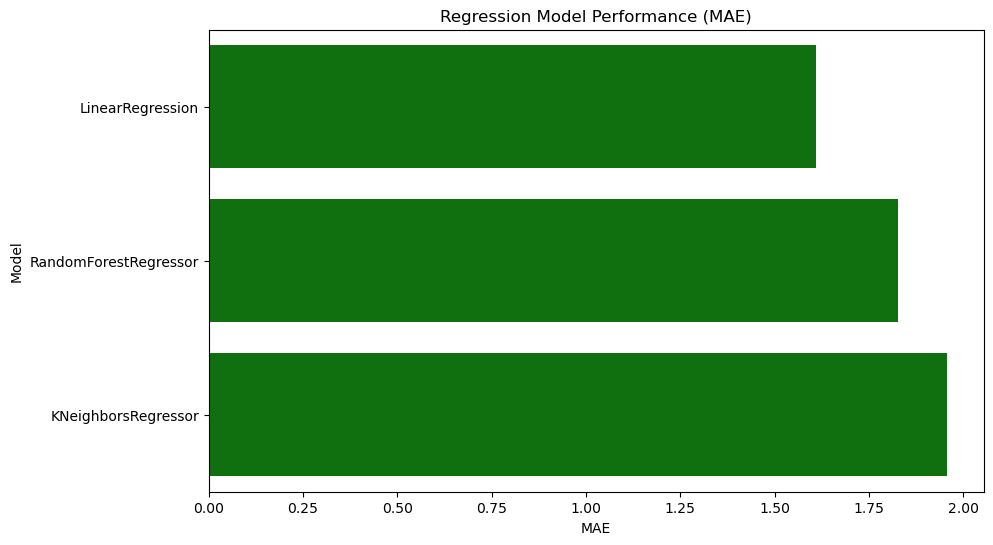

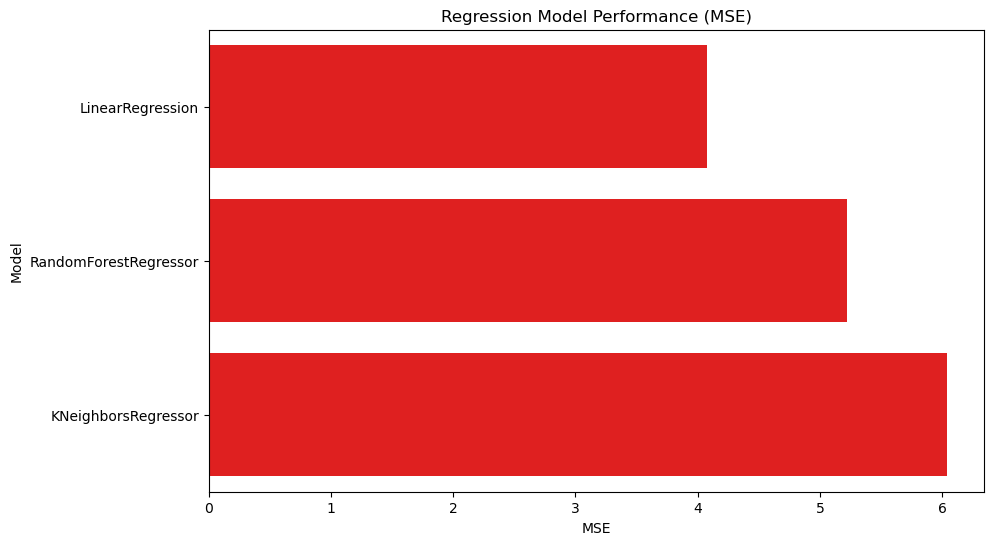

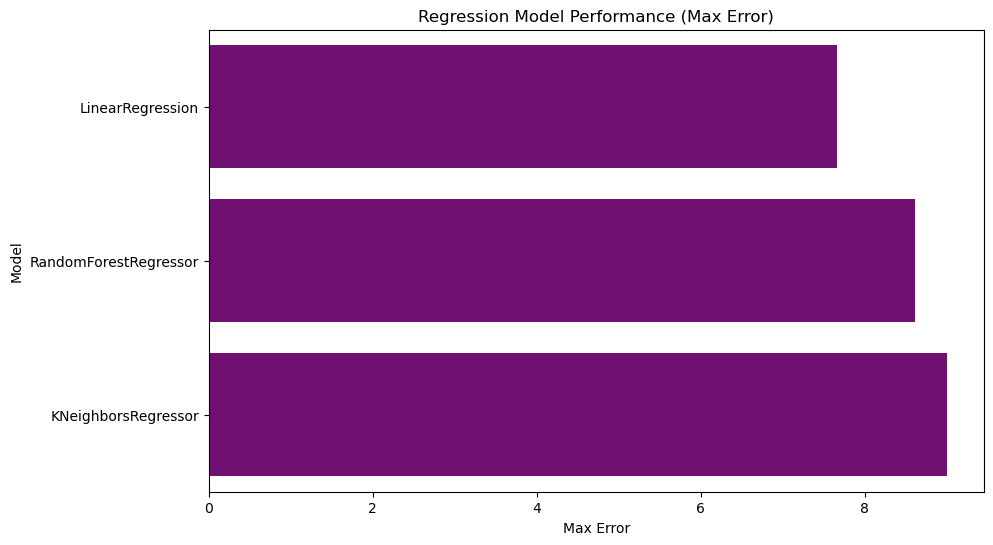

In [34]:
#MAE
plt.figure(figsize=(10, 6))
plt.xlabel('MAE')
plt.title('Regression Model Performance (MAE)')
sns.barplot(x='MAE', y='Model', data=results.sort_values(by='MAE', ascending=True), color="g")
plt.show()

#MSE
plt.figure(figsize=(10, 6))
plt.xlabel('MSE')
plt.title('Regression Model Performance (MSE)')
sns.barplot(x='MSE', y='Model', data=results.sort_values(by='MSE', ascending=True), color="r")
plt.show()

plt.figure(figsize=(10, 6))
plt.xlabel('Max Error')
plt.title('Regression Model Performance (Max Error)')
sns.barplot(x='Max Error', y='Model', data=results.sort_values(by='Max Error', ascending=True), color="purple")
plt.show()

### Вывод:
#### На основании результатов проверок с помощью метрик, мы сделали вывод что для обучения модели на основе успеваемости студентов(оценок за экзамены), лучше всего себя показала Линейная Регрессия. Так как она лучше всего себя показала в проверке метриками.